# The comparison of tropical precipitation histograms for different data

# Structure

1. [Load of packages, modules and data](#1-load-of-packages-modules-and-data)

2. [Initialization of precipitation diagnostic and setting the class attributes](#2-initializing-the-class-object-and-setting-the-class-attributes)

3. [Calculation of histogram of tropical precipitation](#3-calculating-the-histograms-of-tropical-precipitation)
 
4. [Comparing the plots for different data](#4-comparing-the-plots-for-different-data)


## 1. Load of  packages, modules and data

In [1]:
import sys

from aqua import Reader, catalogue
from aqua.benchmark import functions_for_xarrays,  graphic_creator, time_functions
sys.path.insert(0, '../')
from src.trop_prec_diagnostic import TR_PR_Diagnostic as TR_PR_Diag

In [2]:
reader = Reader(model="ICON", exp="ngc2009", source="atm_2d_ml_R02B09", regrid="r010")
icon = reader.retrieve(regrid=True)

/home/b/b382267/mambaforge/envs/tropical-rainfall/lib/python3.10/site-packages/smmregrid/regrid.py:537: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = source_data.map(self.regrid, keep_attrs=True)
/home/b/b382267/mambaforge/envs/tropical-rainfall/lib/python3.10/site-packages/smmregrid/regrid.py:537: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.res

In [3]:
reader = Reader(model="IFS", exp="tco2559-ng5", source="ICMGG_atm2d", regrid="r010")
ifs = reader.retrieve(regrid=True)

## 2. Initializing the class object and setting the class attributes

In [4]:
diag = TR_PR_Diag(trop_lat=15, s_time = 10, f_time = 20, num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-6)/15)

## 3. Calculating the histograms of tropical precipitation

In [5]:
hist_icon = diag.hist1d_fast(icon)
hist_icon 

<xarray.DataArray (bin: 20)>
array([6.903579e+06, 6.964800e+04, 3.705800e+04, 2.428600e+04,
       1.763600e+04, 1.353300e+04, 1.085500e+04, 9.089000e+03,
       7.773000e+03, 6.784000e+03, 5.793000e+03, 5.097000e+03,
       4.493000e+03, 3.969000e+03, 3.814000e+03, 3.470000e+03,
       3.083000e+03, 2.989000e+03, 2.710000e+03, 2.411000e+03])
Coordinates:
  * bin      (bin) float64 0.0 6.667e-08 1.333e-07 ... 1.2e-06 1.267e-06
Attributes: (12/16)
    CDI_grid_type:                unstructured
    cell_methods:                 t: mean
    long_name:                    Mean total precipitation rate
    number_of_grid_in_reference:  1
    param:                        52.1.0
    standard_name:                pr
    ...                           ...
    shortName:                    tprate
    target_units:                 m s**-1
    factor:                       0.001
    offset:                       0
    src_units:                    kg m-2 s-1
    units_fixed:                  1

In [6]:
hist_ifs  = diag.hist1d_fast(ifs)
hist_ifs

<xarray.DataArray (bin: 20)>
array([6.659502e+06, 1.276290e+05, 6.236400e+04, 4.080800e+04,
       3.030200e+04, 2.334100e+04, 1.905100e+04, 1.594300e+04,
       1.350900e+04, 1.178100e+04, 1.038900e+04, 9.150000e+03,
       8.307000e+03, 7.394000e+03, 6.762000e+03, 6.120000e+03,
       5.590000e+03, 5.129000e+03, 4.852000e+03, 4.328000e+03])
Coordinates:
  * bin      (bin) float64 0.0 6.667e-08 1.333e-07 ... 1.2e-06 1.267e-06
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

## 4. Comparing the plots for different data

{<Axes: xlabel='Precipitation, m s**-1', ylabel='PDF'>,
 <Figure size 640x480 with 1 Axes>}

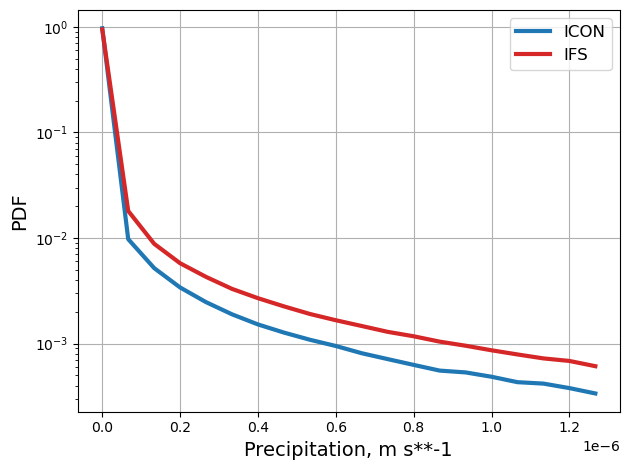

In [7]:
add = diag.hist_figure(hist_icon, pdf = True, smooth = True, label='ICON/ICON', save=False, plot_title = '')
diag.hist_figure(hist_ifs, pdf = True, smooth = True, add = add, color ='tab:red', label='IFS', save=False, 
                 plot_title = '') #"Trop precipitation rate comparison")